# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy



In [2]:
# Output File (CSV)

city_weather_data_file = "data/cities_weather_data.csv"

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding selected lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)


605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#assign url variables

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"       

#create list for dataframe

response = []
name=[]
latitude =[]
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
               
#set up counter for log

city_id = 0
series = 1

#Loop for responses

for city in cities:
    
    #create query url

    query_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"
    print(query_url)
     
    #Count city and set series limits
    
    if city_id <= 49:
        city_id += 1 
        
        #print log
        
        print(f"Processing record for City {city_id} of Series {series} : Name = {city}")
        
        #request data from Open Weather 
        
        try:
            city_data_response = requests.get(query_url).json()
            
            response.append(city_data_response)          
            latitude.append(city_data_response['coord']['lat'])
            longitude.append(city_data_response['coord']['lon'])
            temperature.append(city_data_response['main']['temp_max'])
            humidity.append(city_data_response['main']['humidity'])
            cloudiness.append(city_data_response['clouds']['all'])
            wind_speed.append(city_data_response['wind']['speed'])
            country.append(city_data_response['sys']['country'])
            name.append(city_data_response['name'])
            date.append(city_data_response['dt'])
        
        except:
    
            print("City not found. Next...")
        
   #Reset series and city_id after 50 cities 

    else:
        series += 1
        city_id = 0
    

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=khatanga&units=imperial
Processing record for City 1 of Series 1 : Name = khatanga
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=umm durman&units=imperial
Processing record for City 2 of Series 1 : Name = umm durman
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=upernavik&units=imperial
Processing record for City 3 of Series 1 : Name = upernavik
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=halifax&units=imperial
Processing record for City 4 of Series 1 : Name = halifax
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=drayton valley&units=imperial
Processing record for City 5 of Series 1 : Name = drayton valley
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=deputatskiy

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=malakal&units=imperial
Processing record for City 48 of Series 1 : Name = malakal
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=hermanus&units=imperial
Processing record for City 49 of Series 1 : Name = hermanus
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=marcona&units=imperial
Processing record for City 50 of Series 1 : Name = marcona
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=vaini&units=imperial
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=saint george&units=imperial
Processing record for City 1 of Series 2 : Name = saint george
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=puerto ayora&units=imperial
Processing record for City 2 of Series 2 : Name = puer

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=norman wells&units=imperial
Processing record for City 45 of Series 2 : Name = norman wells
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=eisenhuttenstadt&units=imperial
Processing record for City 46 of Series 2 : Name = eisenhuttenstadt
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=huazolotitlan&units=imperial
Processing record for City 47 of Series 2 : Name = huazolotitlan
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=north bend&units=imperial
Processing record for City 48 of Series 2 : Name = north bend
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=bestobe&units=imperial
Processing record for City 49 of Series 2 : Name = bestobe
http://api.openweathermap.org/data/2.5/weather?&app

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=kaitangata&units=imperial
Processing record for City 42 of Series 3 : Name = kaitangata
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=belmonte&units=imperial
Processing record for City 43 of Series 3 : Name = belmonte
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=east london&units=imperial
Processing record for City 44 of Series 3 : Name = east london
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=vardo&units=imperial
Processing record for City 45 of Series 3 : Name = vardo
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=vila franca do campo&units=imperial
Processing record for City 46 of Series 3 : Name = vila franca do campo
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=kavieng&units=impe

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=rostaq&units=imperial
Processing record for City 39 of Series 4 : Name = rostaq
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=cayenne&units=imperial
Processing record for City 40 of Series 4 : Name = cayenne
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=lahij&units=imperial
Processing record for City 41 of Series 4 : Name = lahij
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=ilulissat&units=imperial
Processing record for City 42 of Series 4 : Name = ilulissat
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=vysokogornyy&units=imperial
Processing record for City 43 of Series 4 : Name = vysokogornyy
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=atakpame&units=imperial


http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=cap malheureux&units=imperial
Processing record for City 35 of Series 5 : Name = cap malheureux
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=rio gallegos&units=imperial
Processing record for City 36 of Series 5 : Name = rio gallegos
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=ario&units=imperial
Processing record for City 37 of Series 5 : Name = ario
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=alta floresta&units=imperial
Processing record for City 38 of Series 5 : Name = alta floresta
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=margate&units=imperial
Processing record for City 39 of Series 5 : Name = margate
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=as

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=durban&units=imperial
Processing record for City 32 of Series 6 : Name = durban
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=faro&units=imperial
Processing record for City 33 of Series 6 : Name = faro
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=okha&units=imperial
Processing record for City 34 of Series 6 : Name = okha
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=kumluca&units=imperial
Processing record for City 35 of Series 6 : Name = kumluca
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=kongoussi&units=imperial
Processing record for City 36 of Series 6 : Name = kongoussi
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=klaksvik&units=imperial
Processing record for City 37 of Series 6 

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=naze&units=imperial
Processing record for City 28 of Series 7 : Name = naze
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=port hedland&units=imperial
Processing record for City 29 of Series 7 : Name = port hedland
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=bowen&units=imperial
Processing record for City 30 of Series 7 : Name = bowen
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=lubango&units=imperial
Processing record for City 31 of Series 7 : Name = lubango
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=nyurba&units=imperial
Processing record for City 32 of Series 7 : Name = nyurba
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=burica&units=imperial
Processing record for City 33 of Ser

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=knysna&units=imperial
Processing record for City 26 of Series 8 : Name = knysna
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=tefe&units=imperial
Processing record for City 27 of Series 8 : Name = tefe
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=praya&units=imperial
Processing record for City 28 of Series 8 : Name = praya
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=maceio&units=imperial
Processing record for City 29 of Series 8 : Name = maceio
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=bolshoye sorokino&units=imperial
Processing record for City 30 of Series 8 : Name = bolshoye sorokino
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=denpasar&units=imperial
Pr

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=hovd&units=imperial
Processing record for City 23 of Series 9 : Name = hovd
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=luderitz&units=imperial
Processing record for City 24 of Series 9 : Name = luderitz
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=fukue&units=imperial
Processing record for City 25 of Series 9 : Name = fukue
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=mongar&units=imperial
Processing record for City 26 of Series 9 : Name = mongar
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=qaqortoq&units=imperial
Processing record for City 27 of Series 9 : Name = qaqortoq
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=touros&units=imperial
Processing record for City 28 of Series 9 

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=erdenet&units=imperial
Processing record for City 19 of Series 10 : Name = erdenet
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=medvedka&units=imperial
Processing record for City 20 of Series 10 : Name = medvedka
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=paita&units=imperial
Processing record for City 21 of Series 10 : Name = paita
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=solano&units=imperial
Processing record for City 22 of Series 10 : Name = solano
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=dodge city&units=imperial
Processing record for City 23 of Series 10 : Name = dodge city
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=vijapur&units=imperial
Processing record for City

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=batticaloa&units=imperial
Processing record for City 16 of Series 11 : Name = batticaloa
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=boa vista&units=imperial
Processing record for City 17 of Series 11 : Name = boa vista
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=kangavar&units=imperial
Processing record for City 18 of Series 11 : Name = kangavar
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=luanda&units=imperial
Processing record for City 19 of Series 11 : Name = luanda
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=dzhusaly&units=imperial
Processing record for City 20 of Series 11 : Name = dzhusaly
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=ketchikan&units

http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=rusape&units=imperial
Processing record for City 12 of Series 12 : Name = rusape
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=pacific grove&units=imperial
Processing record for City 13 of Series 12 : Name = pacific grove
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=dolbeau&units=imperial
Processing record for City 14 of Series 12 : Name = dolbeau
City not found. Next...
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=pemangkat&units=imperial
Processing record for City 15 of Series 12 : Name = pemangkat
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=saquena&units=imperial
Processing record for City 16 of Series 12 : Name = saquena
http://api.openweathermap.org/data/2.5/weather?&appid=f7630b50b1c6ed94b0f414ca128a3927&q=beberibe&unit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
name

['Khatanga',
 'Upernavik',
 'Halifax',
 'Drayton Valley',
 'Deputatsky',
 'Ribeira Grande',
 'Leh',
 'Mbeya',
 'Bredasdorp',
 'Eureka',
 'Saint-Philippe',
 'Rikitea',
 'Varhaug',
 'Camacha',
 'Port Alfred',
 "Kuril'sk",
 'Saint Paul Harbor',
 'Cape Town',
 'Gobabis',
 'Airai',
 'Busselton',
 'Dikson',
 'Butaritari',
 'Gijang',
 'Porto Walter',
 'Jiayuguan City',
 'Durusu',
 'Ritchie',
 'Avarua',
 'Katobu',
 'Yellowknife',
 'Pevek',
 'Codrington',
 'Fond du Lac',
 'Nikolskoye',
 'Srednekolymsk',
 'Merauke',
 'Tilichiki',
 'Qaanaaq',
 'Ola',
 'Puerto del Rosario',
 'Kapaa',
 'Nema',
 'Clyde River',
 'Malakal',
 'Hermanus',
 'Saint George',
 'Puerto Ayora',
 'Ushuaia',
 'Sinjai',
 'Watsa',
 '‘Āhuimanu',
 'Leningradskiy',
 'Vredendal',
 'Martapura',
 'Viseu',
 'Marsá Maţrūḩ',
 'General Roca',
 'Esim',
 'Jamestown',
 'Narsaq',
 'Arraial do Cabo',
 'Serebryansk',
 'Hobart',
 'Albany',
 'Saint-Augustin',
 'Bluff',
 'Tromsø',
 'Alugan',
 'Zeya',
 'Slave Lake',
 'Emerald',
 'Kuito',
 'Griffith'

In [6]:
#Creates dataframe

weather_data = pd.DataFrame({"City" : name,
                            "Latitude": latitude,
                            "Longitude": longitude,
                            "Maximum Temperature (F)": temperature,
                            "Humidity (%)": humidity,
                            "Cloudiness (%)": cloudiness,
                            "Wind Speed (MPH)": wind_speed,
                            "Country": country,
                            "Date": date})




#weather_data.to_csv("data/city_weather_data.csv")

weather_data.count()



City                       546
Latitude                   546
Longitude                  546
Maximum Temperature (F)    546
Humidity (%)               546
Cloudiness (%)             546
Wind Speed (MPH)           546
Country                    546
Date                       546
dtype: int64

In [7]:
#Veiw data frame

weather_data.head()

,City,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,Khatanga,71.9667,102.5000,-32.30,84,98,2.93,RU,1611262643
1,Upernavik,72.7868,-56.1549,25.30,98,87,8.95,GL,1611262643
2,Halifax,44.6453,-63.5724,27.00,46,75,9.22,CA,1611262542
3,Drayton Valley,53.2168,-114.9854,26.01,71,100,8.01,CA,1611262644
4,Deputatsky,69.3000,139.9000,-33.20,82,100,4.00,RU,1611262644


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#Check to see if any cities have humidity over 100%

weather_data.describe()

,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,20.122156,22.562225,49.368242,73.956044,56.364469,7.666722,1.611263e+09
std,33.400164,91.540546,33.592795,19.029429,39.132203,5.574416,5.965196e+01
min,-54.800000,-174.350000,-54.420000,12.000000,0.000000,0.290000,1.611262e+09
25%,-6.988200,-59.093925,28.902500,63.250000,20.000000,3.440000,1.611263e+09
50%,24.854500,26.498450,62.115000,79.000000,72.000000,6.275000,1.611263e+09
75%,48.963850,104.052475,76.727500,88.000000,96.750000,10.360000,1.611263e+09
max,78.218600,179.316700,102.200000,100.000000,100.000000,35.680000,1.611263e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.


humidity_100_percent = weather_data.loc[weather_data["Humidity (%)"] >= 100]
     
humidity_100_percent    
    
    


,City,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
19,Airai,-8.9266,125.4092,62.22,100,98,2.39,TL,1611262646
141,Carnarvon,-24.8667,113.6333,75.20,100,75,13.80,AU,1611262664
152,Sitka,57.0531,-135.3300,37.40,100,90,4.21,US,1611262666
253,Antonovo,43.1500,26.1667,30.20,100,100,3.44,BG,1611262685
257,Faro,37.0194,-7.9322,60.80,100,75,18.41,PT,1611262471
263,Ćuprija,43.9275,21.3700,30.20,100,0,1.14,RS,1611262576
286,Ruteng,-8.6136,120.4721,63.52,100,100,1.28,ID,1611262689
308,Kloulklubed,7.0419,134.2556,75.20,100,75,3.44,PW,1611262692
365,Östersund,63.1792,14.6357,24.01,100,90,18.41,SE,1611262702
423,Bairiki Village,1.3292,172.9752,75.20,100,90,8.05,KI,1611262709


In [10]:
#Remove cities with humidities > 100%

Cleaned_weather_data = weather_data.loc[weather_data["Humidity (%)"] < 100]
     
Cleaned_weather_data.count()

City                       533
Latitude                   533
Longitude                  533
Maximum Temperature (F)    533
Humidity (%)               533
Cloudiness (%)             533
Wind Speed (MPH)           533
Country                    533
Date                       533
dtype: int64

10 humidity results were over 100%

## Latitude vs. Temperature Plot

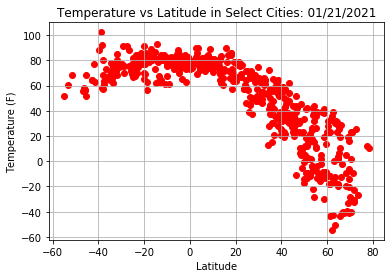

In [11]:
# Build a scatter plot for each data type

plt.scatter(Cleaned_weather_data["Latitude"], Cleaned_weather_data["Maximum Temperature (F)"], marker="o", color="red")

date_of_analysis = pd.Timestamp("today").strftime("%m/%d/%Y")

# Incorporate the other graph properties

plt.title("Temperature vs Latitude in Select Cities:"+ " " + date_of_analysis)
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

 #Save the figure
    
plt.savefig("Images/Temperature vs Latitude in Select Cities: .png")

# Show plot

plt.show()

The code is analyzing the relationship between cities latitude and their max temperature.
The plot is suggesting that there is a strong correlation between latitude and max temperature. The closer cities are to the equators the higher temperature and drops as they approach the poles.

## Latitude vs. Humidity Plot

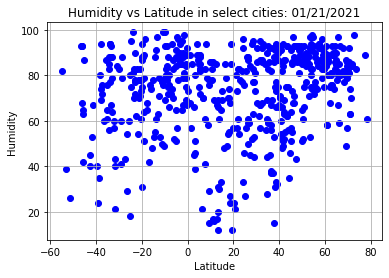

In [12]:
# Build a scatter plot for each data type

plt.scatter(Cleaned_weather_data["Latitude"], Cleaned_weather_data["Humidity (%)"], marker="o", color="blue")

# Incorporate the other graph properties

plt.title("Humidity vs Latitude in select cities:" + " " + date_of_analysis)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("Humidity vs Latitude in select cities.png")

# Show plot

plt.show()

The code is analyzing the relationship between cities latitude and their humidity.
The plot is suggesting that there is no correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

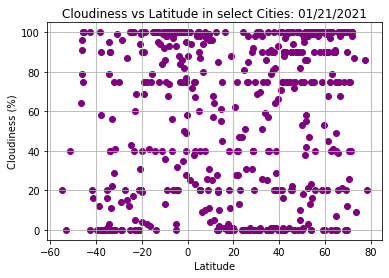

In [13]:
# Build a scatter plot for each data type

plt.scatter(Cleaned_weather_data["Latitude"], Cleaned_weather_data["Cloudiness (%)"], marker="o", color="purple")

# Incorporate the other graph properties

plt.title("Cloudiness vs Latitude in select Cities:" + " " + date_of_analysis)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("Cloudiness vs Latitude in select Cities.png")

# Show plot

plt.show()

The code is analyzing the relationship between cities latitude and their cloudiness. 
The plot is suggesting that there is little to no correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

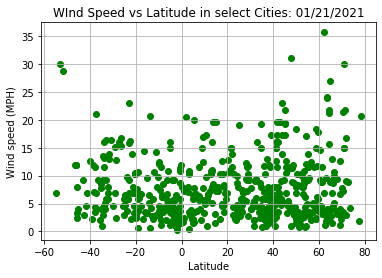

In [14]:
# Build a scatter plot for each data type

plt.scatter(Cleaned_weather_data["Latitude"], Cleaned_weather_data["Wind Speed (MPH)"], marker="o", color="green")

# Incorporate the other graph properties

plt.title("WInd Speed vs Latitude in select Cities:" + " " + date_of_analysis)
plt.ylabel("Wind speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("WInd Speed vs Latitude in select Cities.png")

# Show plot

plt.show()

The code is analyzing the relationship between cities latitude and their wind speed. The plot is suggesting that the closer cities are to the north pole the more cities with higher wind speed.

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames

Northern_Hemisphere = Cleaned_weather_data.loc[Cleaned_weather_data["Latitude"] > 0]
Southern_Hemisphere = Cleaned_weather_data.loc[Cleaned_weather_data["Latitude"] < 0]

Northern_Hemisphere

,City,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,Khatanga,71.9667,102.5000,-32.30,84,98,2.93,RU,1611262643
1,Upernavik,72.7868,-56.1549,25.30,98,87,8.95,GL,1611262643
2,Halifax,44.6453,-63.5724,27.00,46,75,9.22,CA,1611262542
3,Drayton Valley,53.2168,-114.9854,26.01,71,100,8.01,CA,1611262644
4,Deputatsky,69.3000,139.9000,-33.20,82,100,4.00,RU,1611262644
...,...,...,...,...,...,...,...,...,...
539,Anacortes,48.5126,-122.6127,45.00,81,90,3.44,US,1611262546
541,Ranong,9.9658,98.6348,70.54,86,4,3.27,TH,1611262726
542,Houma,29.5958,-90.7195,75.00,73,75,9.22,US,1611262718
543,Aden,12.7794,45.0367,75.67,67,28,10.33,YE,1611262655


In [16]:
Southern_Hemisphere

,City,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
7,Mbeya,-8.9000,33.4500,61.02,93,100,1.16,TZ,1611262645
8,Bredasdorp,-34.5322,20.0403,69.80,88,95,9.22,ZA,1611262645
10,Saint-Philippe,-21.3585,55.7679,82.40,78,0,6.91,RE,1611262645
11,Rikitea,-23.1203,-134.9692,78.71,72,0,15.86,PF,1611262645
14,Port Alfred,-33.5906,26.8910,69.01,93,11,5.01,ZA,1611262450
...,...,...,...,...,...,...,...,...,...
522,Rurrenabaque,-14.4413,-67.5278,93.20,55,40,5.14,BO,1611262724
531,Maraã,-1.8333,-65.3667,79.88,90,35,0.74,BR,1611262725
537,Valdivia,-39.8142,-73.2459,87.80,40,0,12.66,CL,1611262726
540,Lakes Entrance,-37.8811,147.9810,68.00,69,58,4.38,AU,1611262726


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7308293741533419


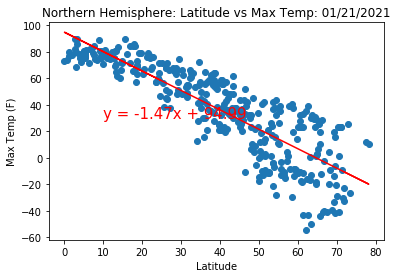

In [17]:
# Build a scatter plot for each data type
# Print out the r-squared value along with the plot.

#Set parameters for Linear Regression

x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Maximum Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create scatter plot

plt.scatter(x_values,y_values)

#create regression line

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

# Create labels for plot

plt.title("Northern Hemisphere: Latitude vs Max Temp:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

#Print r^2 value

print(f"The r-squared is: {rvalue**2}")

plt.savefig("Northern Hemisphere: Latitude vs Max Temp.png")
plt.show()


Observation: 
It can be observed that the closer one gets to the equator the maximum temperature is higher. The r-squared value indicates 
that there is a correlation between latitude and maximum temperature in the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.19783524594734408


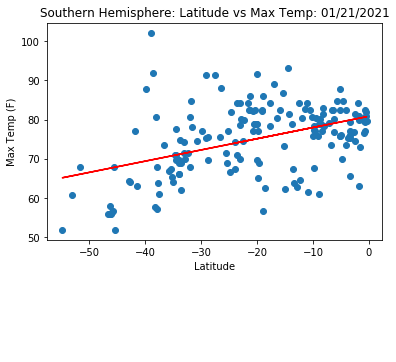

In [18]:
# Build a scatter plot for each data type
# Print out the r-squared value along with the plot.

#Set up linear regression parameters

x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Maximum Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create scatter plot

plt.scatter(x_values,y_values)

#Create regression line

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,20),fontsize=1,color="green")

#Create labels for plot

plt.title("Southern Hemisphere: Latitude vs Max Temp:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

#Print r^2 value

print(f"The r-squared is: {rvalue**2}")

plt.savefig("Southern Hemisphere: Latitude vs Max Temp.png")
plt.show()


Observation: 
It can be observed that the closer one gets to the equator the maximum temperature is higher. The r-squared value indicates 
that there is a correlation between latitude and maximum temperature in the Southern Hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12184691942923664


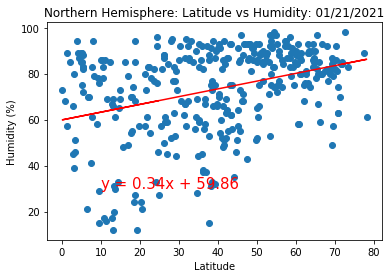

In [19]:
# Build a scatter plot for each data type
# Print out the r-squared value along with the plot.

#Set parameters for plot

x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create scatter plot Northern Hemisphere: Latitude vs Humidity

plt.scatter(x_values,y_values)

#Create regression line for Northern Hemisphere: Latitude vs Humidity
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

#Create labelsNorthern Hemisphere: Latitude vs Humidity
plt.title("Northern Hemisphere: Latitude vs Humidity:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Print r^2 value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Hemisphere: Latitude vs Humidity.png")
plt.show()

Observation: 
It can be observed that the humidity not impacted by latitude. The r-squared value indicates that there 
appears to be no correlation between latitude and humidity in the Northern Hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09357339897484454


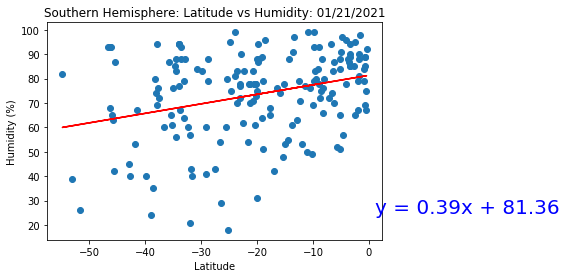

In [20]:
# Build a scatter plot for each data type
# Print out the r-squared value along with the plot.

#set parameters for plot

x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create scatter plot Southern Hemisphere: Latitude vs Humidity

plt.scatter(x_values,y_values)

#Create regression line for Southern Hemisphere: Latitude vs Humidity
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(1,25),fontsize=20,color="blue")

#Create labels for Southern Hemisphere: Latitude vs Humidity
plt.title("Southern Hemisphere: Latitude vs Humidity:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Print r^2

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern Hemisphere: Latitude vs Humidity.png")
plt.show()

Observation: 
It can be observed that the closer one gets to the equator the humidity is higher. The r-squared value indicates that there 
appears to be very little correlation between latitude and humidity in the Southern Hemisphere. This could also be because ther are no cities below -50 latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04616412571924484


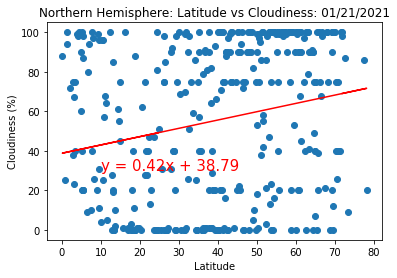

In [21]:
# Build a scatter plot for each data type
# Print out the r-squared value along with the plot.

#Set parameters for plot

x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create scatter plot Northern Hemisphere: Latitude vs Cloudiness

plt.scatter(x_values,y_values)

#Create regression line for Northern Hemisphere: Latitude vs Cloudiness
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

#Create labelsNorthern Hemisphere: Latitude vs Cloudiness
plt.title("Northern Hemisphere: Latitude vs Cloudiness:" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Print r^2 value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Hemisphere: Latitude vs Cloudiness.png")
plt.show()

Observation: 
It can be observed that the closer one gets to the equator you could find more clouds. The r-squared value indicates that there 
appears to be very little correlation between latitude and cloudiness in the Northen Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11625679225480794


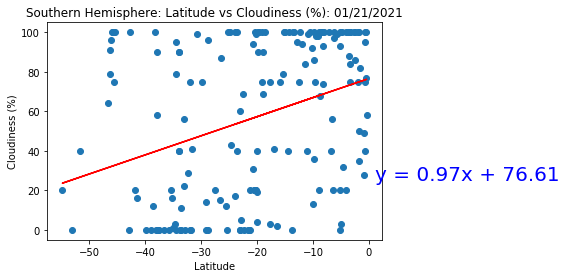

In [22]:
# Build a scatter plot for each data type
# Print out the r-squared value along with the plot.

#set parameters for plot

x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create scatter plot Southern Hemisphere: Latitude vs Cloudiness (%)

plt.scatter(x_values,y_values)

#Create regression line for Southern Hemisphere: Latitude vs Cloudiness (%)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(1,25),fontsize=20,color="blue")

#Create labels for Southern Hemisphere: Latitude vs Cloudiness (%)
plt.title("Southern Hemisphere: Latitude vs Cloudiness (%):" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Print r^2

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern Hemisphere: Latitude vs Cloudiness (%).png")
plt.show()

Observation: 
It can be observed that the closer one gets to the equator you could find more clouds. The r-squared value indicates that there 
appears to be very little correlation between latitude and cloudiness in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006544760005589704


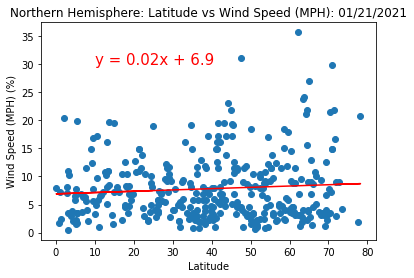

In [23]:
# Build a scatter plot for each data type
# Print out the r-squared value along with the plot.

#Set parameters for plot

x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Wind Speed (MPH)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create scatter plot Northern Hemisphere: Latitude vs Wind Speed (MPH)

plt.scatter(x_values,y_values)

#Create regression line for Northern Hemisphere: Latitude vs Wind Speed (MPH)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

#Create labelsNorthern Hemisphere: Latitude vs Wind Speed (MPH)
plt.title("Northern Hemisphere: Latitude vs Wind Speed (MPH):" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH) (%)')

#Print r^2 value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern Hemisphere: Latitude vs Wind Speed (MPH).png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10632897221161378


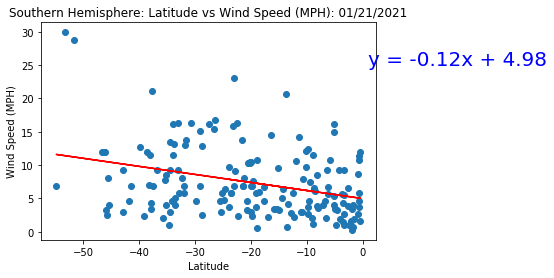

In [24]:
# Build a scatter plot for each data type
# Print out the r-squared value along with the plot.

#set parameters for plot

x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Wind Speed (MPH)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create scatter plot Southern Hemisphere: Latitude vs Wind Speed (MPH)

plt.scatter(x_values,y_values)

#Create regression line for Southern Hemisphere: Latitude vs Wind Speed (MPH)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(1,25),fontsize=20,color="blue")

#Create labels for Southern Hemisphere: Latitude vs Wind Speed (MPH)
plt.title("Southern Hemisphere: Latitude vs Wind Speed (MPH):" + " " + date_of_analysis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

#Print r^2

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern Hemisphere: Latitude vs Wind Speed (MPH).png")
plt.show()

Observation: 
It can be observed that the closer one gets to the equator you could find higher wind speeds. The r-squared value indicates that it appears to be no correlation between latitude and wind speed in the Southern Hemisphere.